In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings('ignore')

In [2]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv("dataset/magic04.data", names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [3]:
df['class'].unique()

array(['g', 'h'], dtype=object)

In [4]:
df['class'] = (df['class'] == 'g').astype(int)

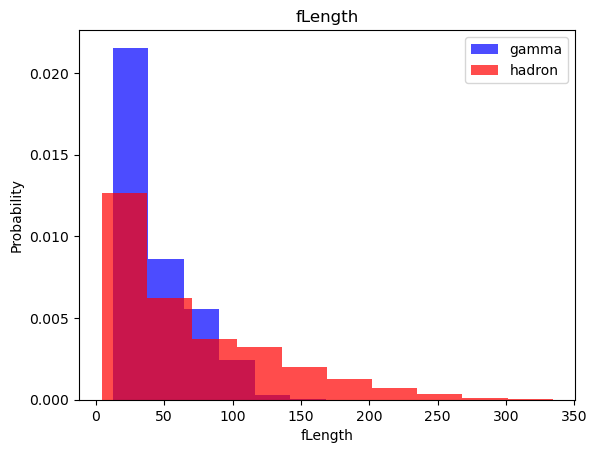

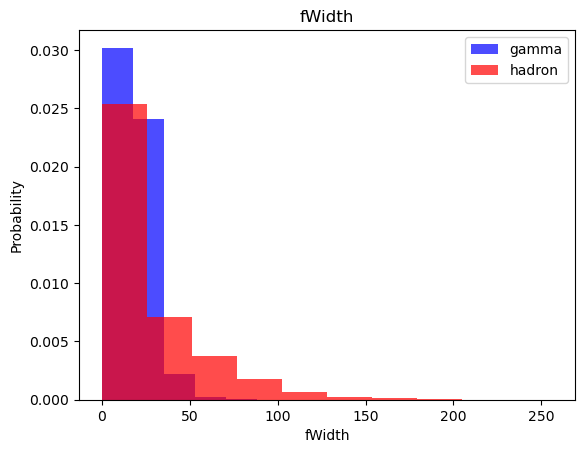

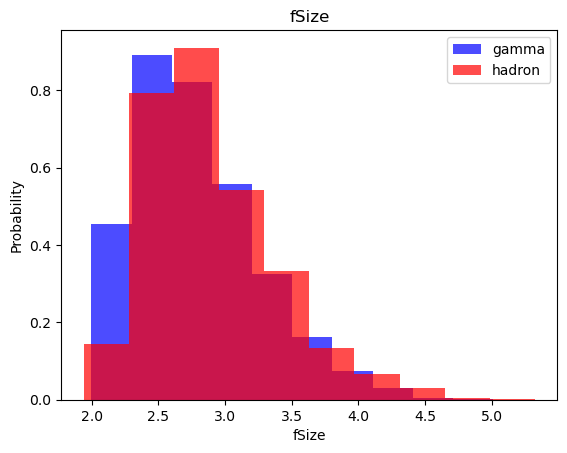

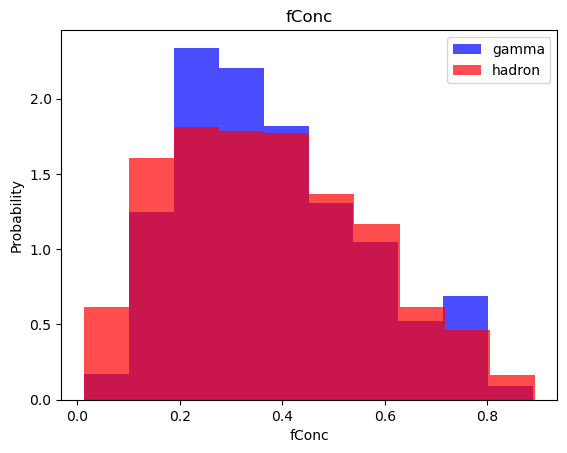

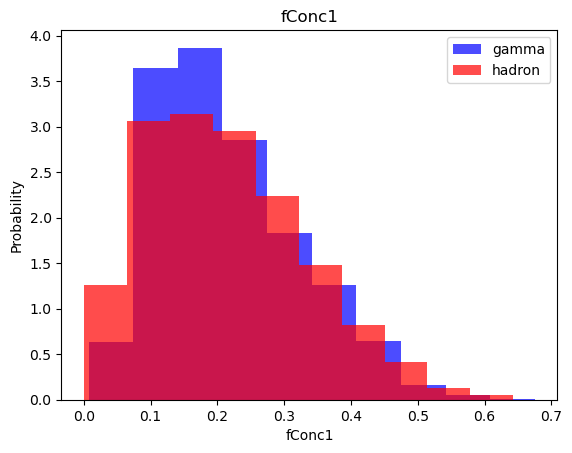

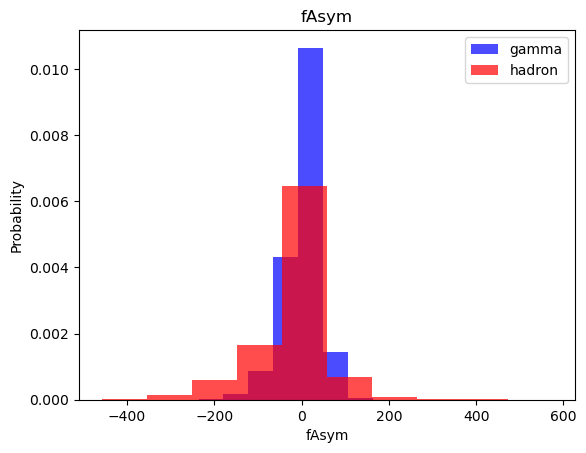

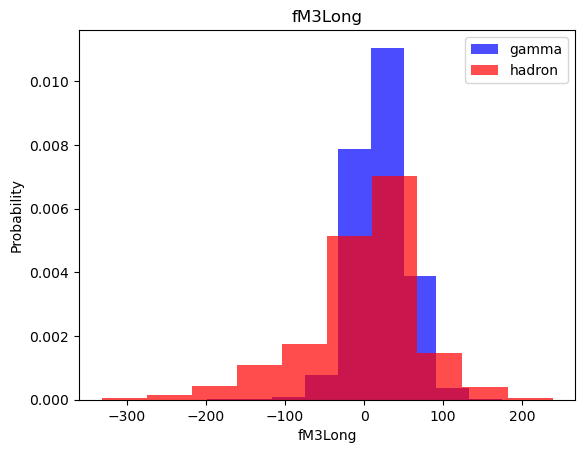

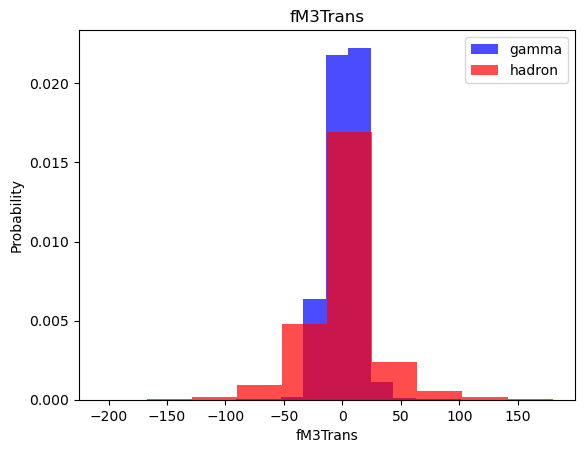

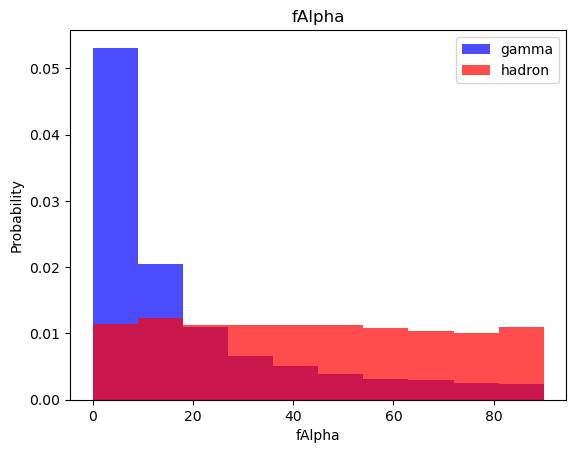

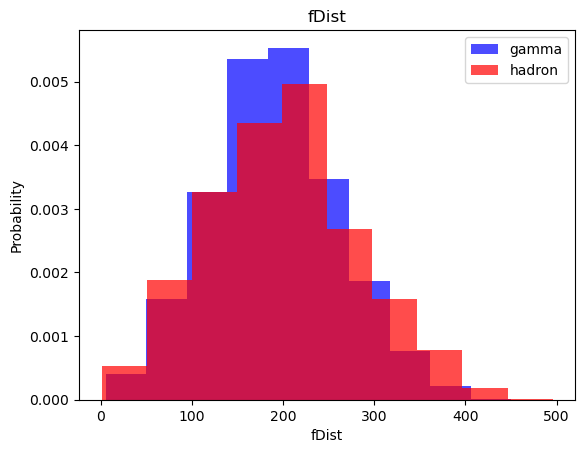

In [5]:
for label in cols[:-1]:
    plt.hist(df[df['class'] == 1][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df['class'] == 0][label], color='red', label='hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

# Train, validation, and test set

In [14]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [9]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)
    
    data = np.hstack((X, np.reshape(y, (-1, 1))))
    
    return data, X, y

In [10]:
train, X_train, y_train = scale_dataset(train, oversample=True)

In [11]:
len(y_train)

14700

In [12]:
sum(y_train==1)

7350

In [13]:
sum(y_train==0)

7350

In [8]:
print(len(train[train['class'] == 1])) # gamma
print(len(train[train['class'] == 0])) # hadron

7350
4062


In [15]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

# KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [28]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [29]:
y_pred = knn_model.predict(X_test)

In [24]:
# neighbours = 1
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72      1362
           1       0.83      0.88      0.85      2442

    accuracy                           0.81      3804
   macro avg       0.79      0.78      0.79      3804
weighted avg       0.80      0.81      0.80      3804



In [27]:
# neighbours = 3
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73      1362
           1       0.85      0.86      0.85      2442

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



In [30]:
# neighbours = 5
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1362
           1       0.85      0.86      0.86      2442

    accuracy                           0.81      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.81      0.81      0.81      3804



# Naive-Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB

In [33]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [34]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.40      0.50      1362
           1       0.73      0.89      0.80      2442

    accuracy                           0.71      3804
   macro avg       0.70      0.64      0.65      3804
weighted avg       0.71      0.71      0.69      3804



# Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [37]:
y_pred = log_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.71      0.71      1362
           1       0.84      0.83      0.83      2442

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# Support Vector Machines

In [38]:
from sklearn.svm import SVC

In [39]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [40]:
y_pred = svc_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1362
           1       0.89      0.89      0.89      2442

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Networks

In [43]:
import tensorflow as tf

In [54]:
def plot_graphs(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
    ax1.plot(history.history['loss'], 'g', label='Training Loss')
    ax1.plot(history.history['val_loss'], 'b', label='Validation Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)
    
    ax2.plot(history.history['accuracy'], 'g', label='Accuracy')
    ax2.plot(history.history['val_accuracy'], 'b', label='Validation Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)
    
    plt.show()

In [50]:
def train_model(X_train, y_train, num_nodes, dropout_prob, learning_rate, batch_size, epochs):
    
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='binary_crossentropy',
                    metrics=['accuracy'])
    
    history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_valid, y_valid), verbose=0
    )
    
    return nn_model, history

In [46]:
history = nn_model.fit(
    X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0
)

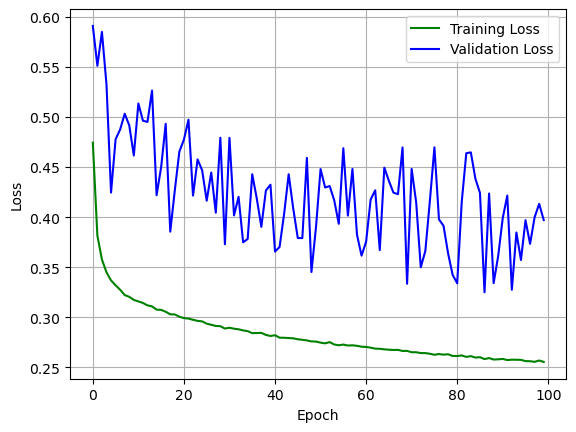

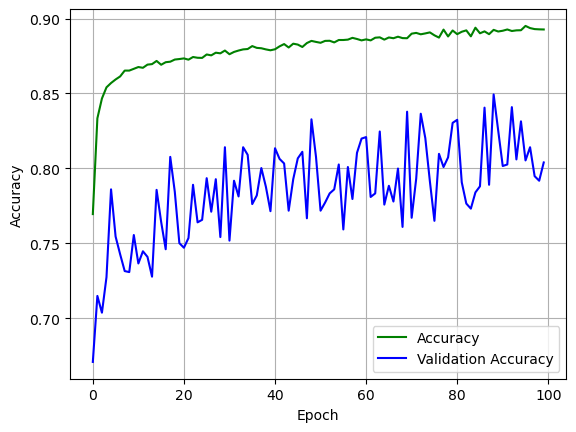

In [49]:
plot_loss(history)
plot_accuracy(history)

16 nodes, dropout 0, learning_rate 0.1, batch size 32


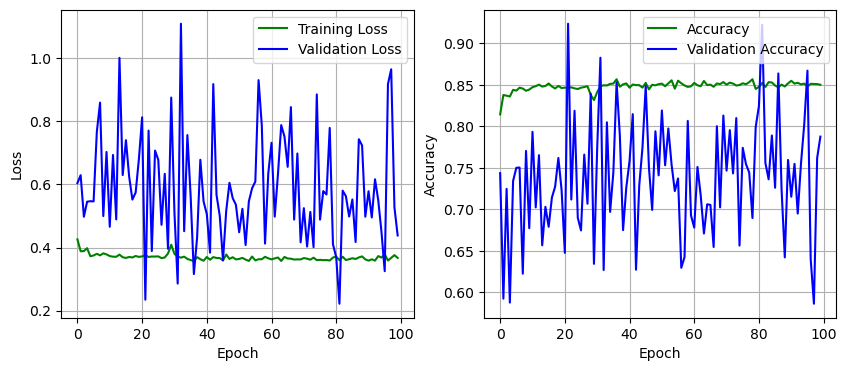

119/119 [==============================] - 0s 2ms/step - loss: 0.3544 - accuracy: 0.8573
16 nodes, dropout 0, learning_rate 0.1, batch size 64


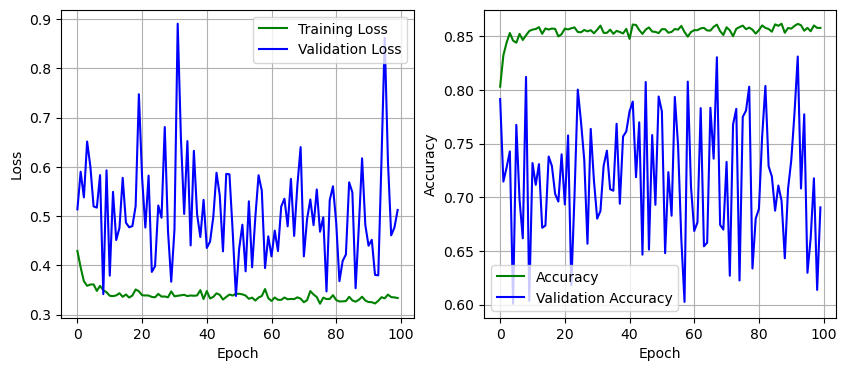

119/119 [==============================] - 0s 1ms/step - loss: 0.3519 - accuracy: 0.8601
16 nodes, dropout 0, learning_rate 0.1, batch size 128


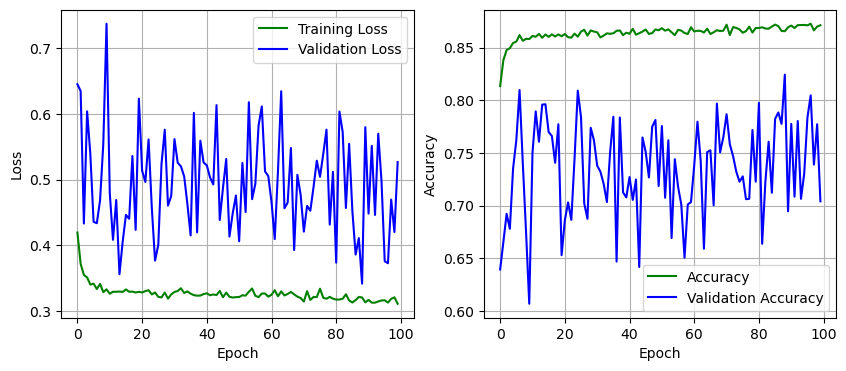

119/119 [==============================] - 0s 1ms/step - loss: 0.3173 - accuracy: 0.8712
16 nodes, dropout 0, learning_rate 0.001, batch size 32


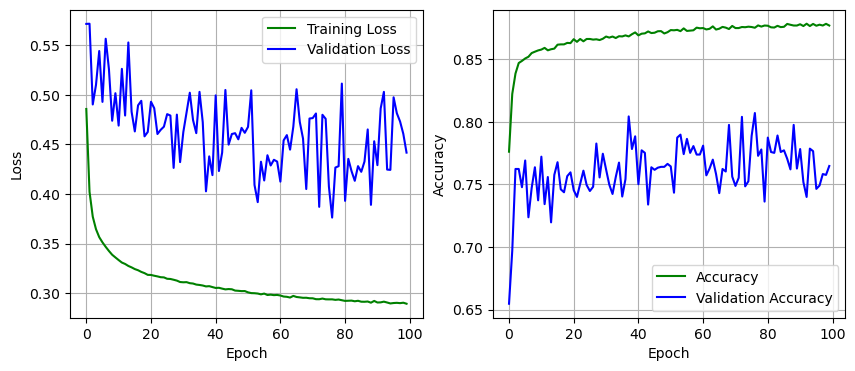

119/119 [==============================] - 0s 1ms/step - loss: 0.3147 - accuracy: 0.8704
16 nodes, dropout 0, learning_rate 0.001, batch size 64


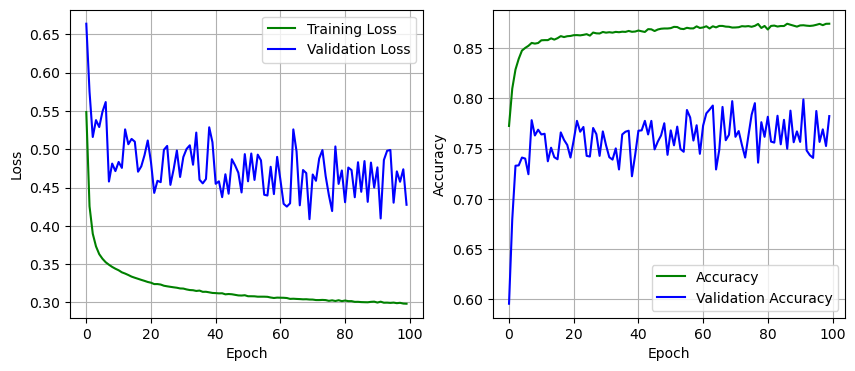

119/119 [==============================] - 0s 2ms/step - loss: 0.3137 - accuracy: 0.8709
16 nodes, dropout 0, learning_rate 0.001, batch size 128


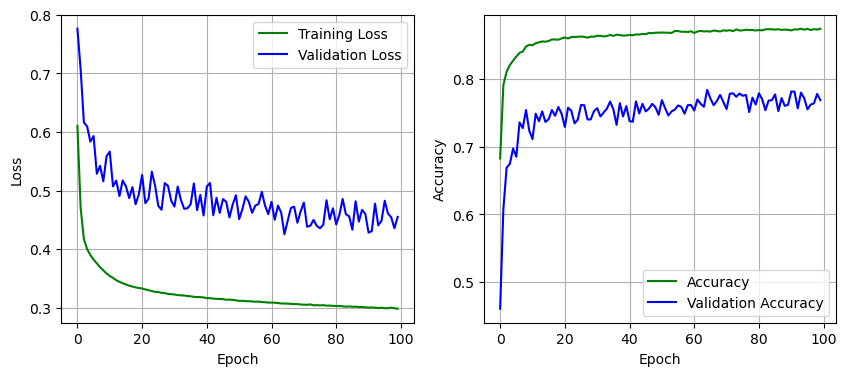

119/119 [==============================] - 0s 2ms/step - loss: 0.3081 - accuracy: 0.8693
16 nodes, dropout 0, learning_rate 0.005, batch size 32


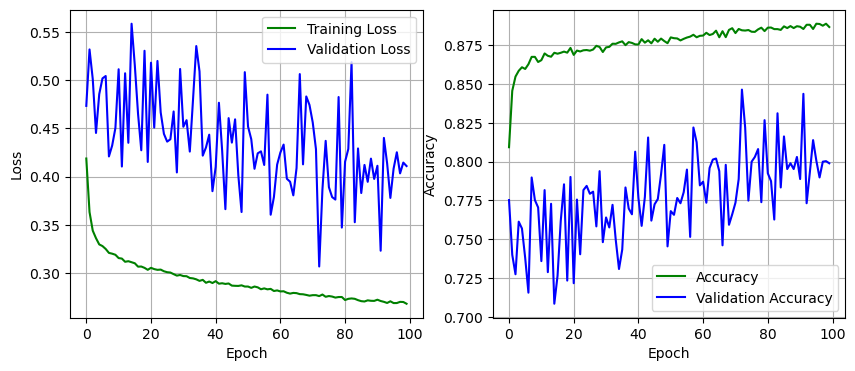

119/119 [==============================] - 0s 2ms/step - loss: 0.3059 - accuracy: 0.8788
16 nodes, dropout 0, learning_rate 0.005, batch size 64


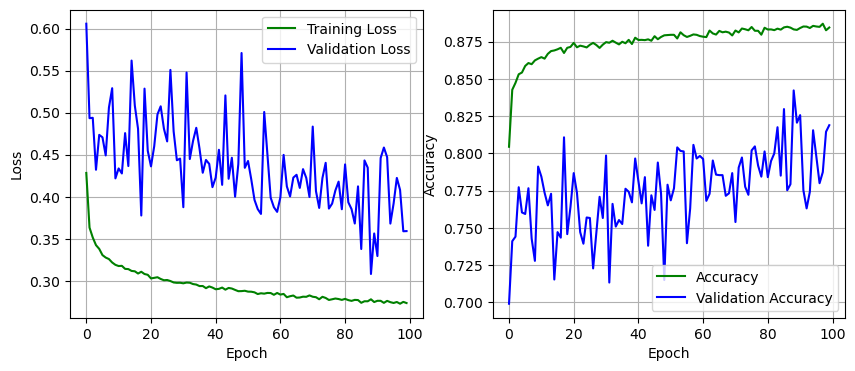

119/119 [==============================] - 0s 2ms/step - loss: 0.3278 - accuracy: 0.8699
16 nodes, dropout 0, learning_rate 0.005, batch size 128


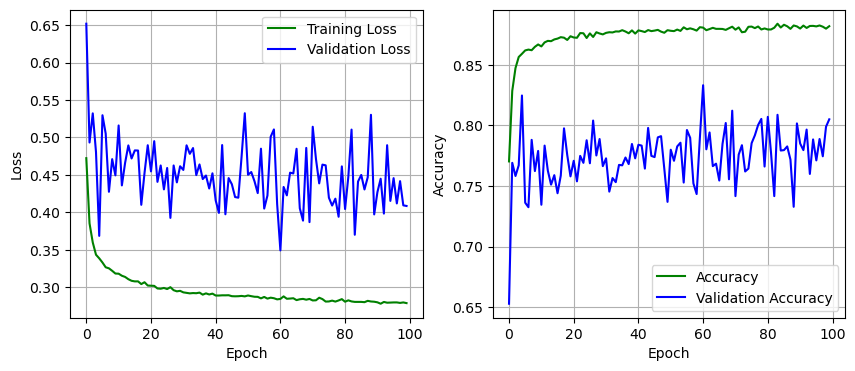

119/119 [==============================] - 0s 1ms/step - loss: 0.3119 - accuracy: 0.8736
16 nodes, dropout 0.2, learning_rate 0.1, batch size 32


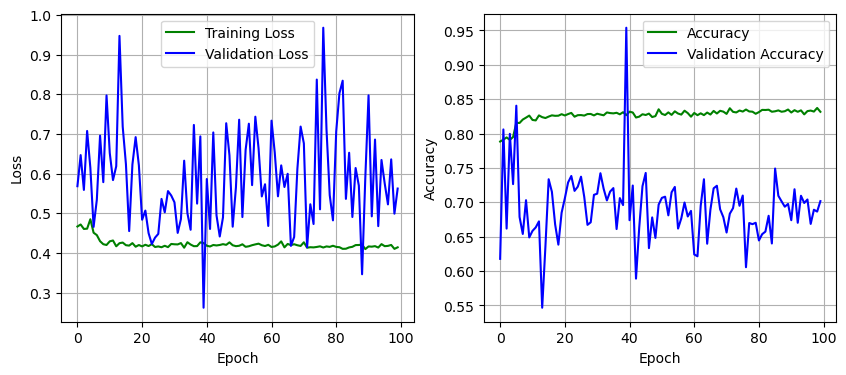

119/119 [==============================] - 0s 1ms/step - loss: 0.4066 - accuracy: 0.8378
16 nodes, dropout 0.2, learning_rate 0.1, batch size 64


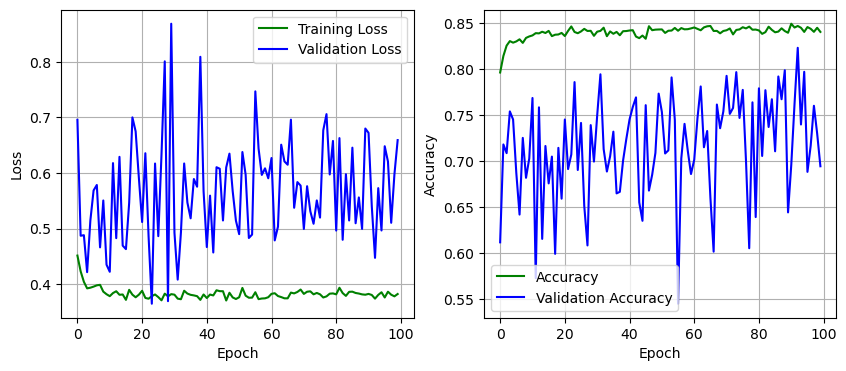

119/119 [==============================] - 0s 1ms/step - loss: 0.3546 - accuracy: 0.8612
16 nodes, dropout 0.2, learning_rate 0.1, batch size 128


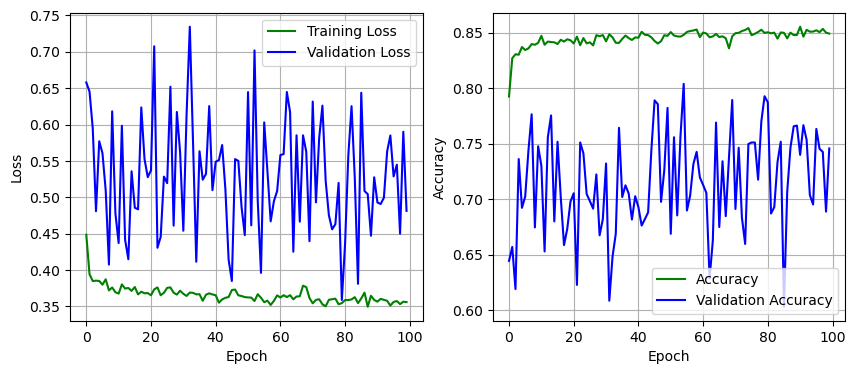

119/119 [==============================] - 0s 1ms/step - loss: 0.3412 - accuracy: 0.8667
16 nodes, dropout 0.2, learning_rate 0.001, batch size 32


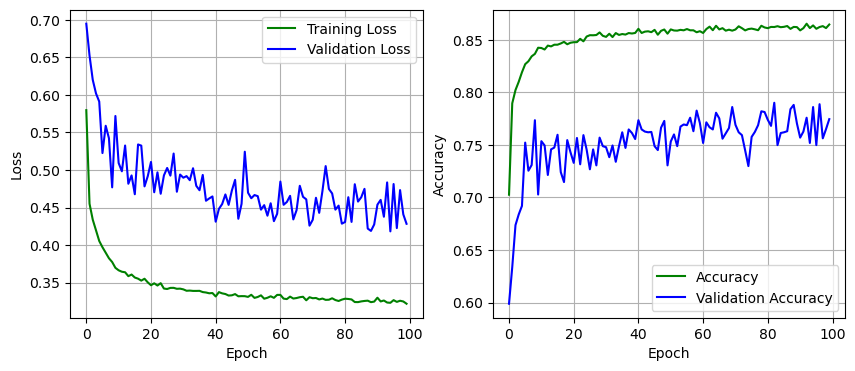

119/119 [==============================] - 0s 1ms/step - loss: 0.3118 - accuracy: 0.8736
16 nodes, dropout 0.2, learning_rate 0.001, batch size 64


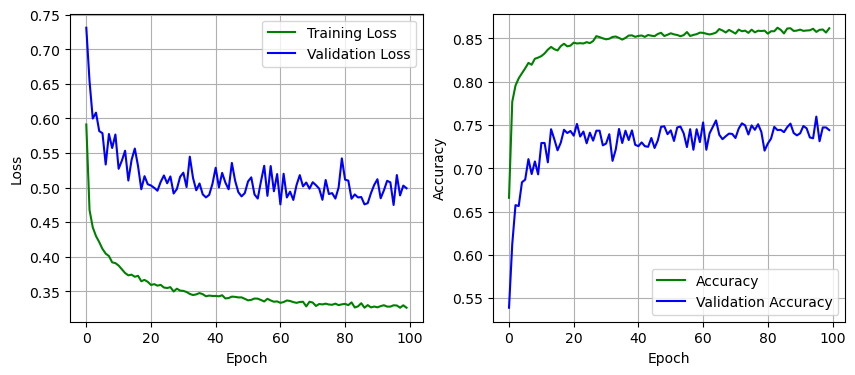

119/119 [==============================] - 0s 1ms/step - loss: 0.3062 - accuracy: 0.8707
16 nodes, dropout 0.2, learning_rate 0.001, batch size 128


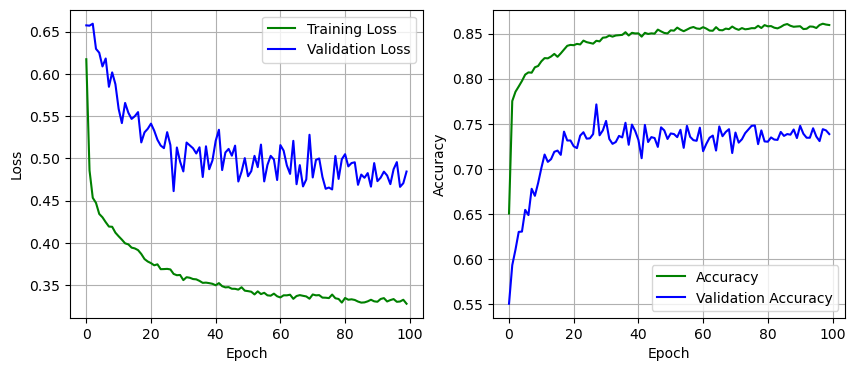

119/119 [==============================] - 0s 1ms/step - loss: 0.3097 - accuracy: 0.8715
16 nodes, dropout 0.2, learning_rate 0.005, batch size 32


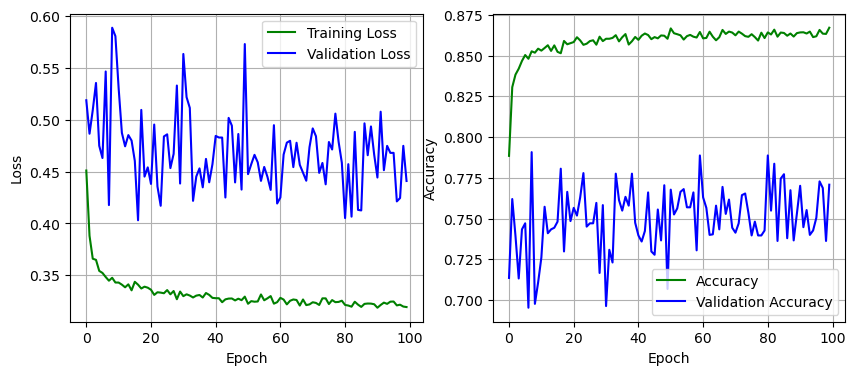

119/119 [==============================] - 0s 1ms/step - loss: 0.3067 - accuracy: 0.8791
16 nodes, dropout 0.2, learning_rate 0.005, batch size 64


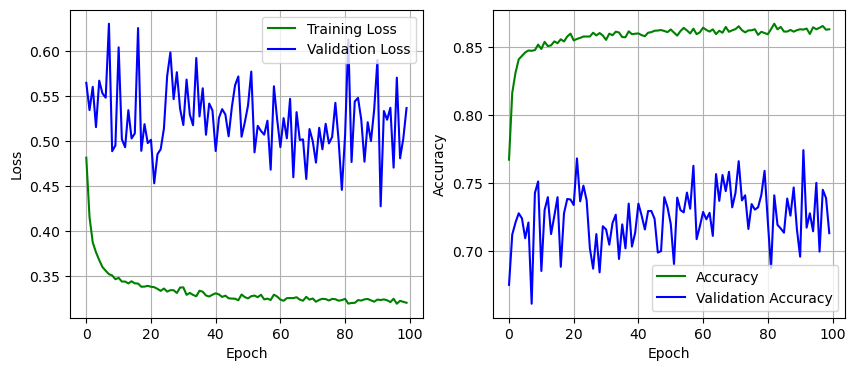

119/119 [==============================] - 0s 1ms/step - loss: 0.3059 - accuracy: 0.8746
16 nodes, dropout 0.2, learning_rate 0.005, batch size 128


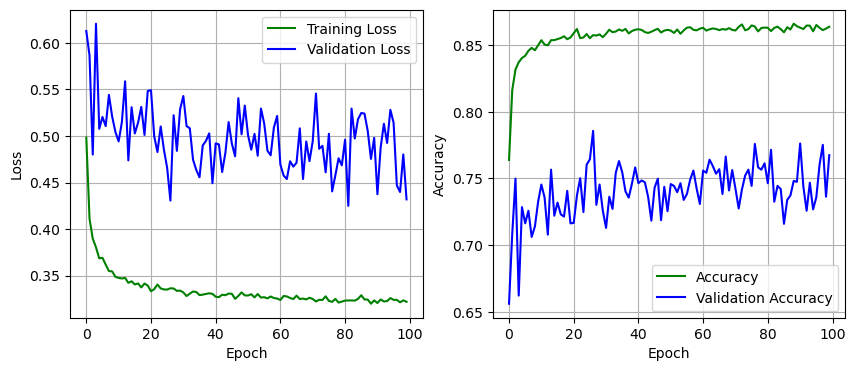

119/119 [==============================] - 0s 1ms/step - loss: 0.3070 - accuracy: 0.8807
32 nodes, dropout 0, learning_rate 0.1, batch size 32


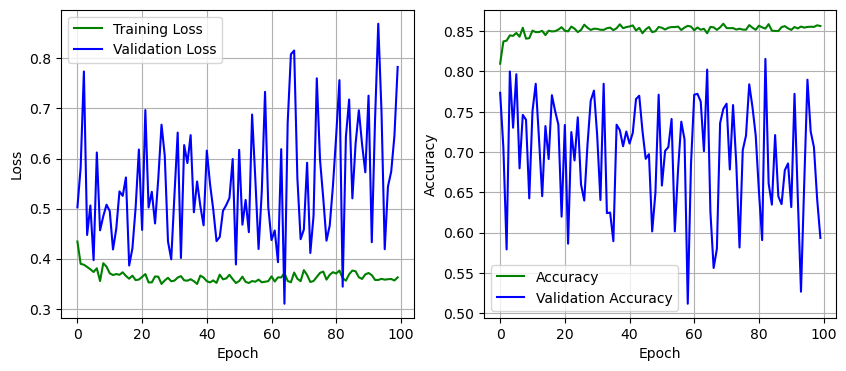

119/119 [==============================] - 0s 1ms/step - loss: 0.3682 - accuracy: 0.8438
32 nodes, dropout 0, learning_rate 0.1, batch size 64


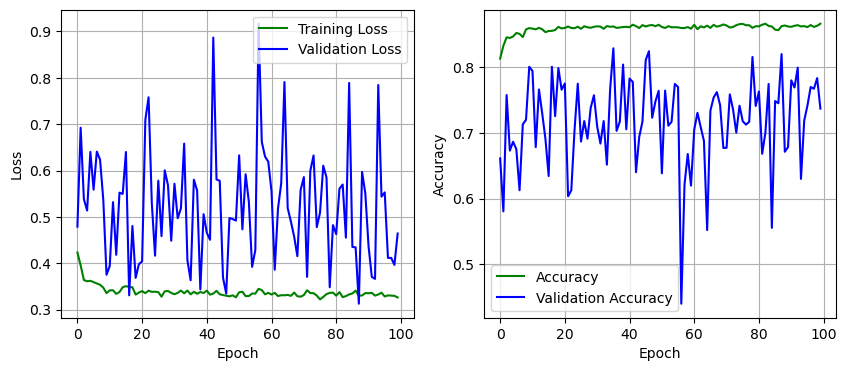

119/119 [==============================] - 0s 1ms/step - loss: 0.3319 - accuracy: 0.8715
32 nodes, dropout 0, learning_rate 0.1, batch size 128


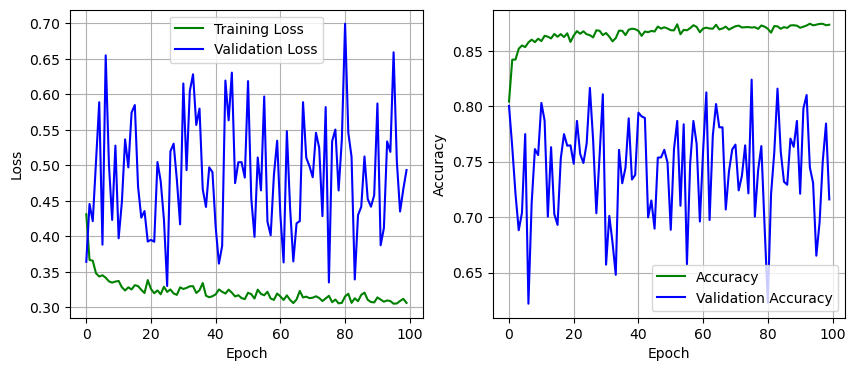

119/119 [==============================] - 0s 1ms/step - loss: 0.3186 - accuracy: 0.8722
32 nodes, dropout 0, learning_rate 0.001, batch size 32


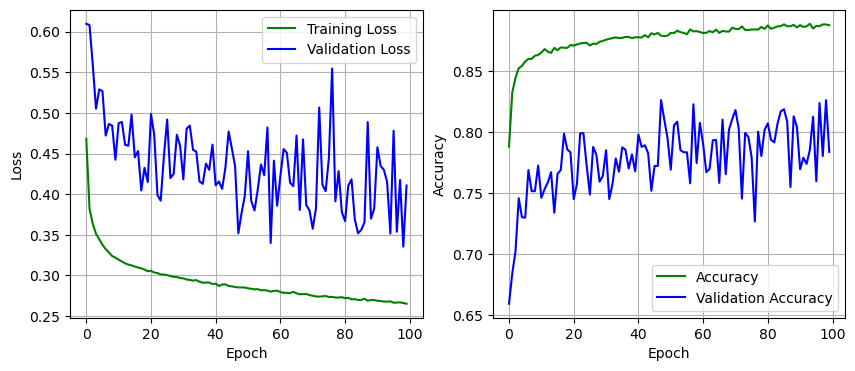

119/119 [==============================] - 0s 1ms/step - loss: 0.3070 - accuracy: 0.8785
32 nodes, dropout 0, learning_rate 0.001, batch size 64


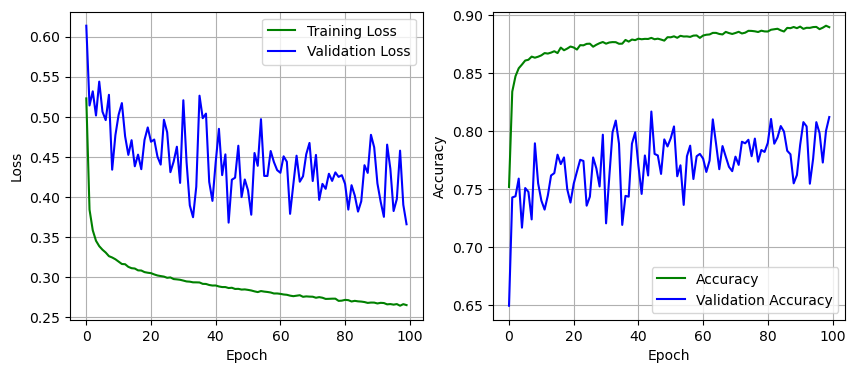

119/119 [==============================] - 0s 1ms/step - loss: 0.3187 - accuracy: 0.8717
32 nodes, dropout 0, learning_rate 0.001, batch size 128


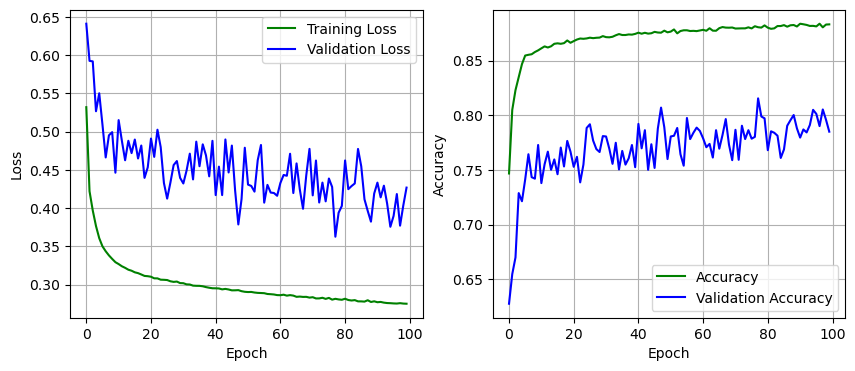

119/119 [==============================] - 0s 2ms/step - loss: 0.3070 - accuracy: 0.8728
32 nodes, dropout 0, learning_rate 0.005, batch size 32


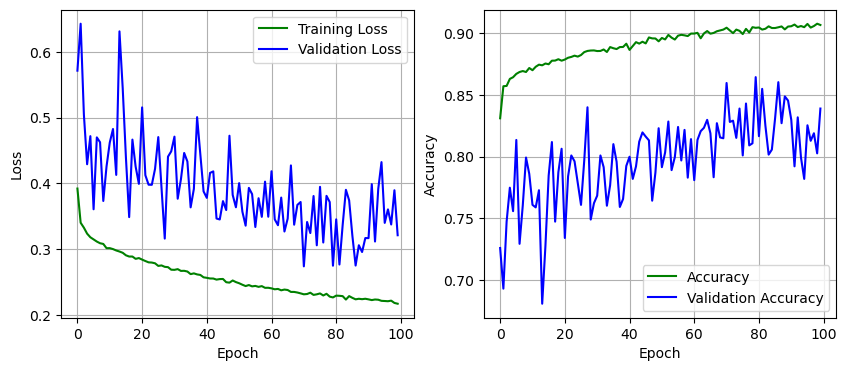

119/119 [==============================] - 0s 1ms/step - loss: 0.3950 - accuracy: 0.8675
32 nodes, dropout 0, learning_rate 0.005, batch size 64


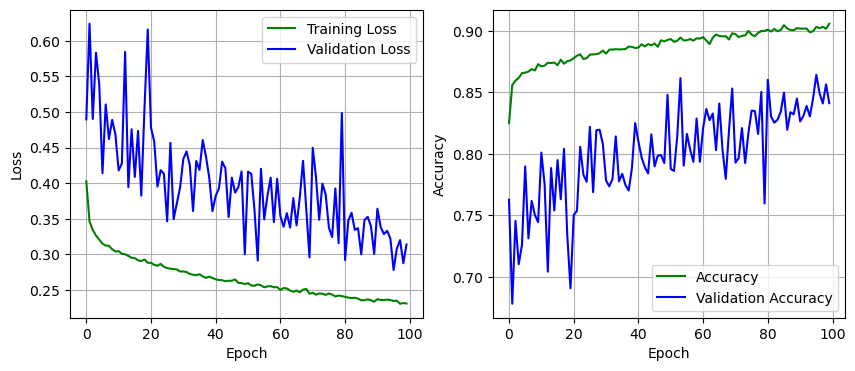

119/119 [==============================] - 0s 1ms/step - loss: 0.3610 - accuracy: 0.8670
32 nodes, dropout 0, learning_rate 0.005, batch size 128


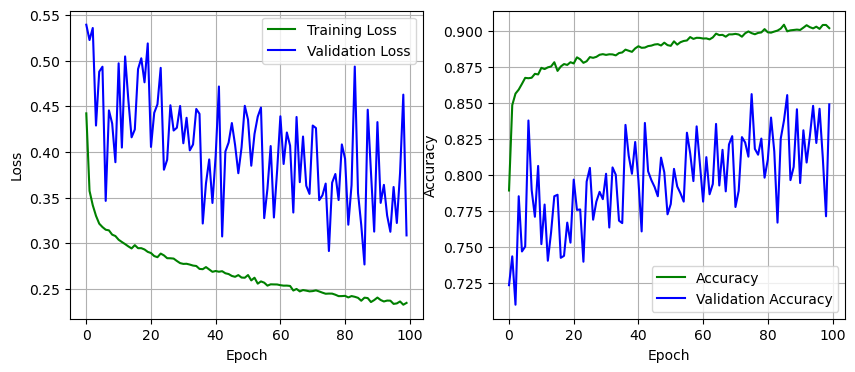

119/119 [==============================] - 0s 1ms/step - loss: 0.3427 - accuracy: 0.8641
32 nodes, dropout 0.2, learning_rate 0.1, batch size 32


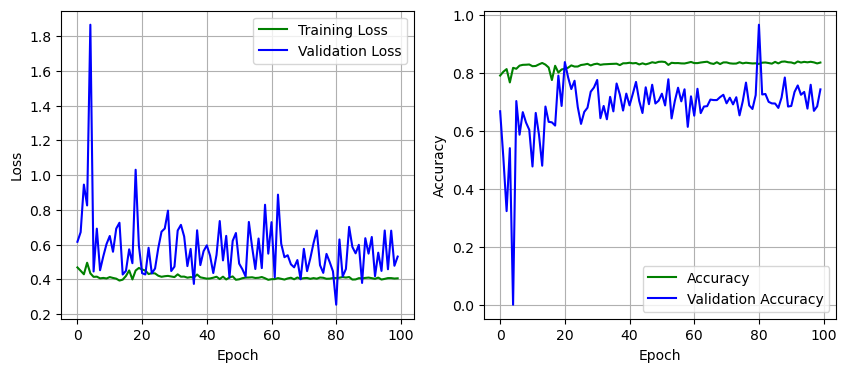

119/119 [==============================] - 0s 1ms/step - loss: 0.3742 - accuracy: 0.8462
32 nodes, dropout 0.2, learning_rate 0.1, batch size 64


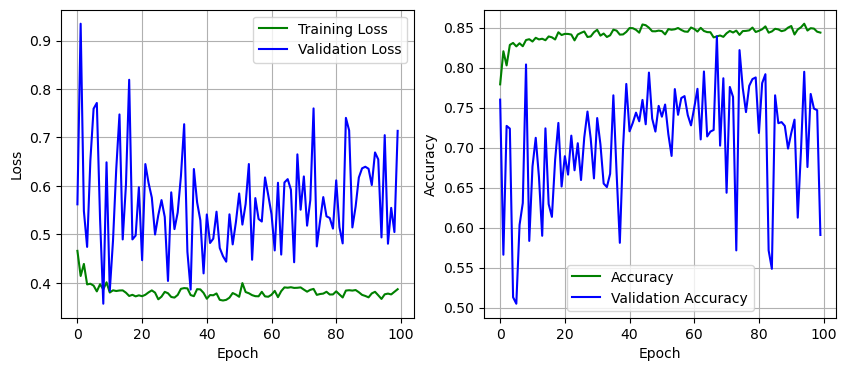

119/119 [==============================] - 0s 1ms/step - loss: 0.3734 - accuracy: 0.8423
32 nodes, dropout 0.2, learning_rate 0.1, batch size 128


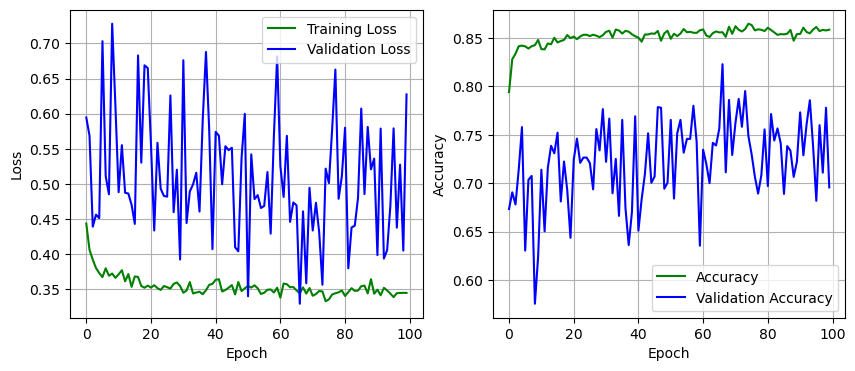

119/119 [==============================] - 0s 1ms/step - loss: 0.3347 - accuracy: 0.8691
32 nodes, dropout 0.2, learning_rate 0.001, batch size 32


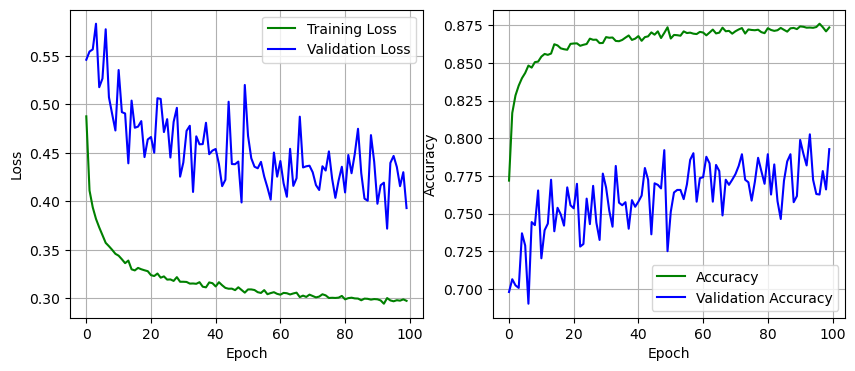

119/119 [==============================] - 0s 1ms/step - loss: 0.2976 - accuracy: 0.8785
32 nodes, dropout 0.2, learning_rate 0.001, batch size 64


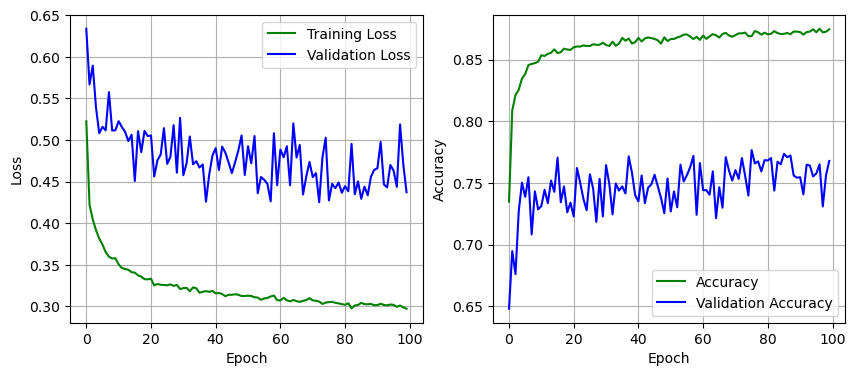

119/119 [==============================] - 0s 1ms/step - loss: 0.2944 - accuracy: 0.8791
32 nodes, dropout 0.2, learning_rate 0.001, batch size 128


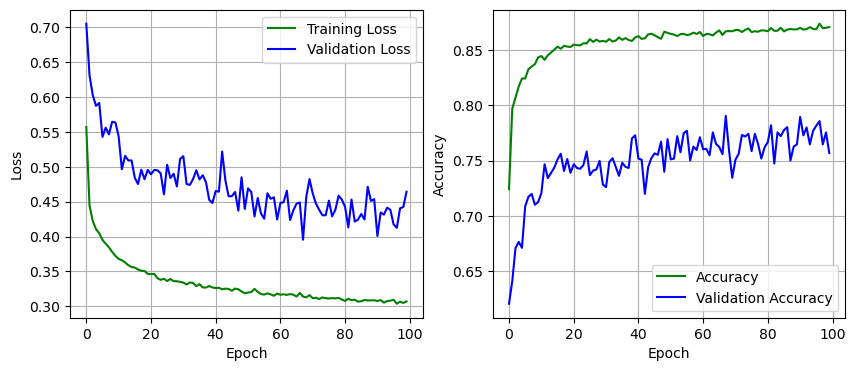

119/119 [==============================] - 0s 1ms/step - loss: 0.2991 - accuracy: 0.8785
32 nodes, dropout 0.2, learning_rate 0.005, batch size 32


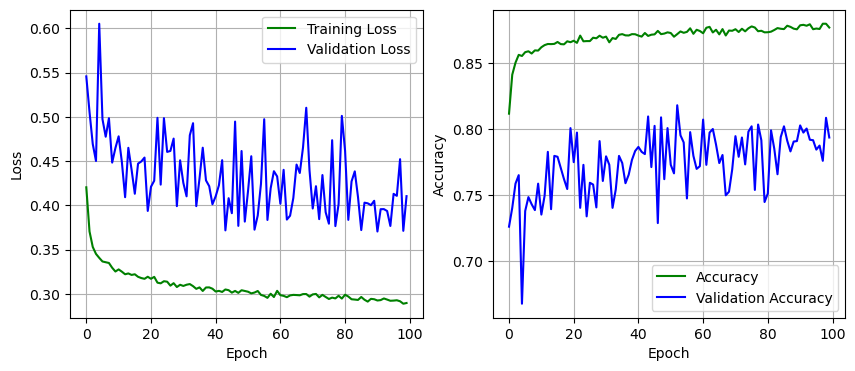

119/119 [==============================] - 0s 1ms/step - loss: 0.3010 - accuracy: 0.8772
32 nodes, dropout 0.2, learning_rate 0.005, batch size 64


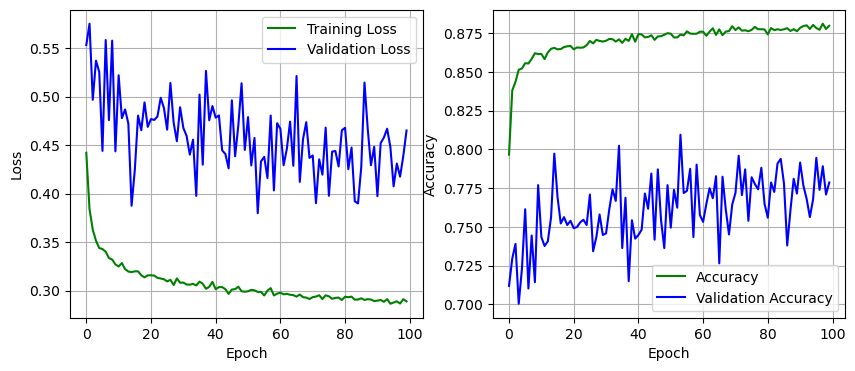

119/119 [==============================] - 0s 2ms/step - loss: 0.3042 - accuracy: 0.8720
32 nodes, dropout 0.2, learning_rate 0.005, batch size 128


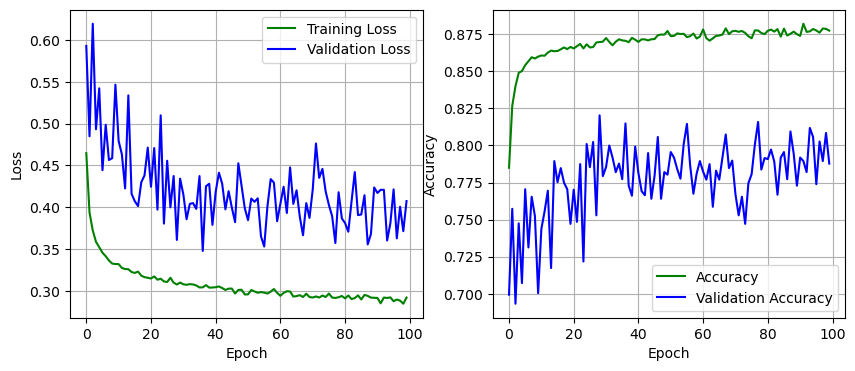

119/119 [==============================] - 0s 2ms/step - loss: 0.2951 - accuracy: 0.8793
64 nodes, dropout 0, learning_rate 0.1, batch size 32


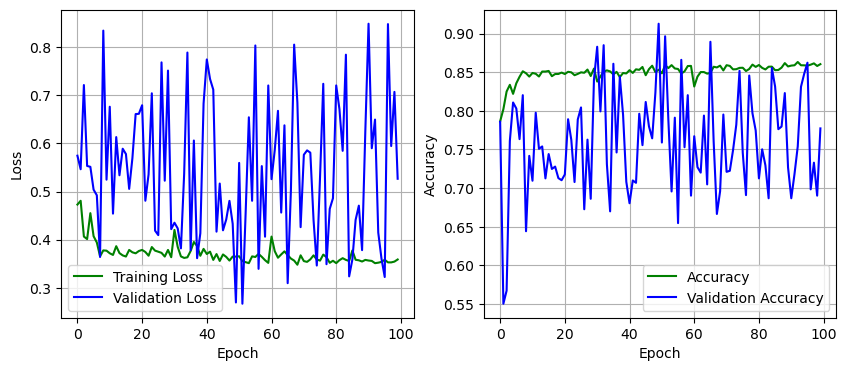

119/119 [==============================] - 0s 2ms/step - loss: 0.3485 - accuracy: 0.8646
64 nodes, dropout 0, learning_rate 0.1, batch size 64


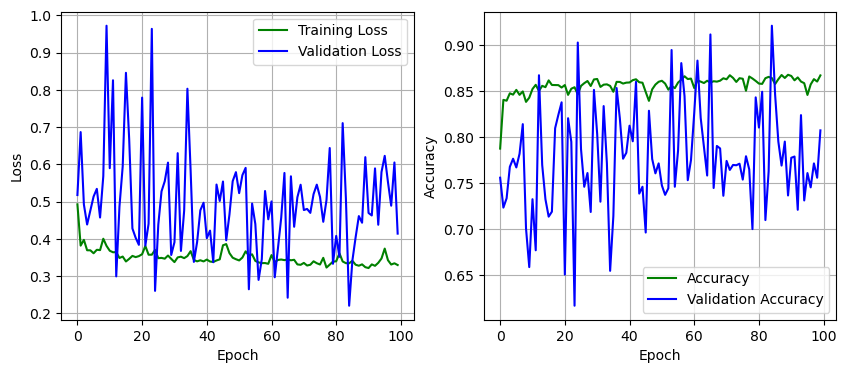

119/119 [==============================] - 0s 2ms/step - loss: 0.3519 - accuracy: 0.8470
64 nodes, dropout 0, learning_rate 0.1, batch size 128


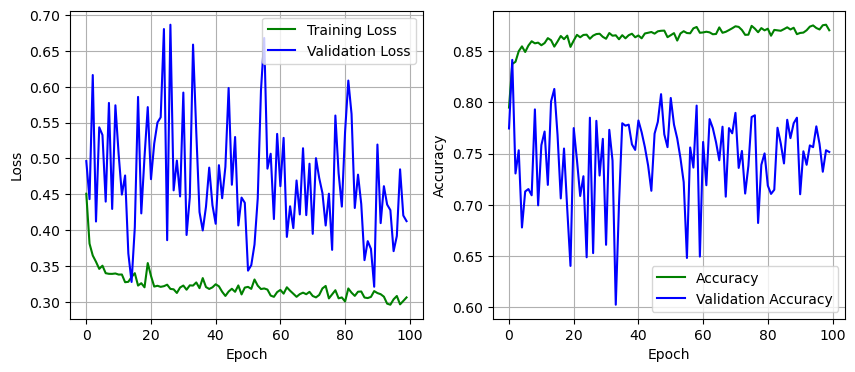

119/119 [==============================] - 0s 2ms/step - loss: 0.3523 - accuracy: 0.8691
64 nodes, dropout 0, learning_rate 0.001, batch size 32


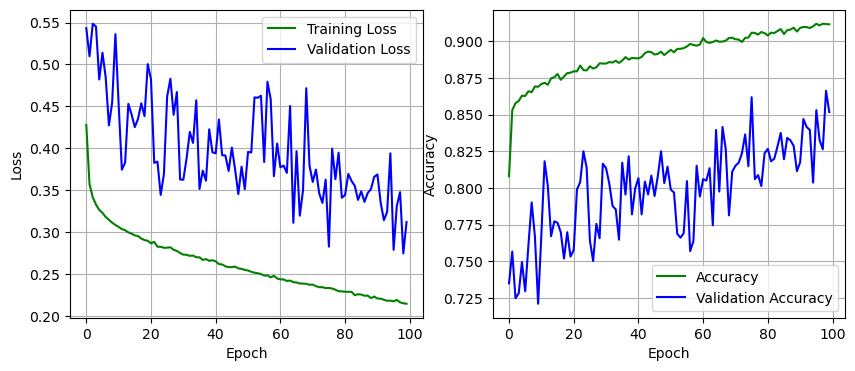

119/119 [==============================] - 0s 1ms/step - loss: 0.3489 - accuracy: 0.8754
64 nodes, dropout 0, learning_rate 0.001, batch size 64


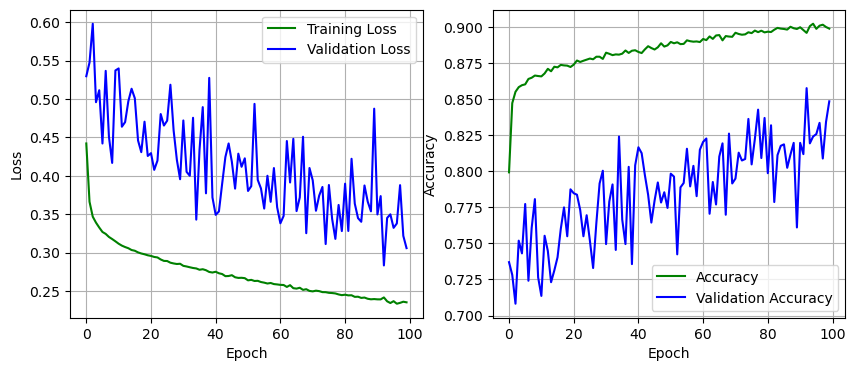

119/119 [==============================] - 0s 1ms/step - loss: 0.3319 - accuracy: 0.8715
64 nodes, dropout 0, learning_rate 0.001, batch size 128


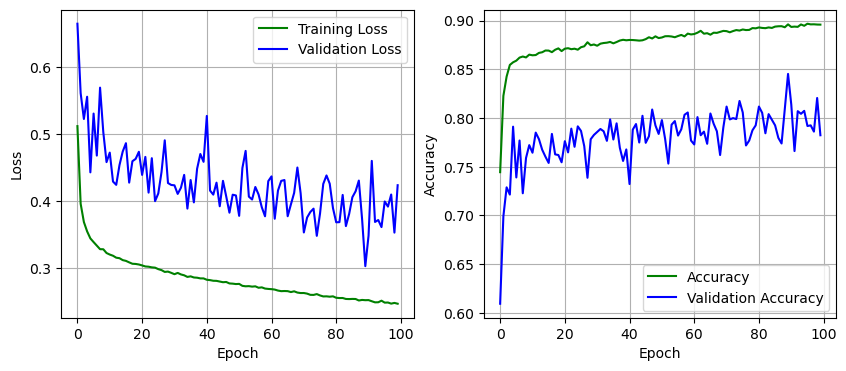

119/119 [==============================] - 0s 1ms/step - loss: 0.3120 - accuracy: 0.8793
64 nodes, dropout 0, learning_rate 0.005, batch size 32


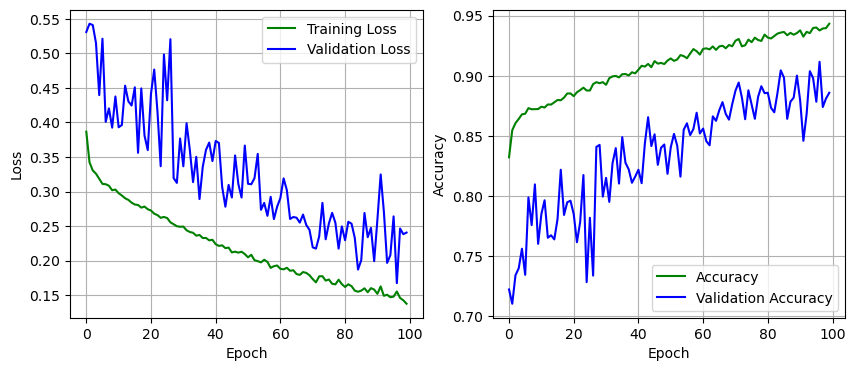

119/119 [==============================] - 0s 1ms/step - loss: 0.5923 - accuracy: 0.8725
64 nodes, dropout 0, learning_rate 0.005, batch size 64


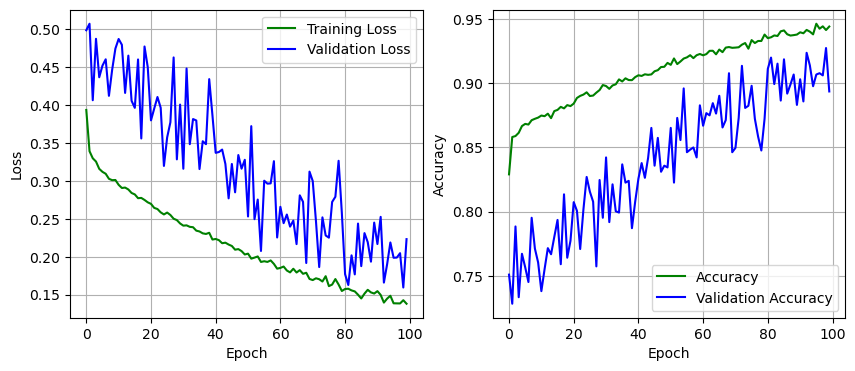

119/119 [==============================] - 0s 1ms/step - loss: 0.5861 - accuracy: 0.8617
64 nodes, dropout 0, learning_rate 0.005, batch size 128


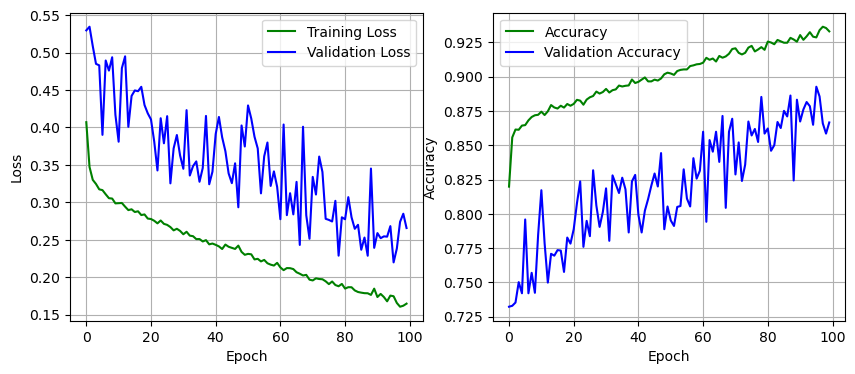

119/119 [==============================] - 0s 1ms/step - loss: 0.4866 - accuracy: 0.8570
64 nodes, dropout 0.2, learning_rate 0.1, batch size 32


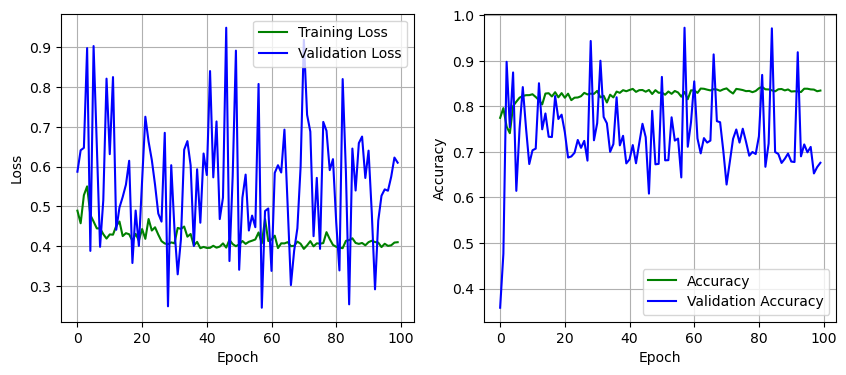

119/119 [==============================] - 0s 2ms/step - loss: 0.3882 - accuracy: 0.8425
64 nodes, dropout 0.2, learning_rate 0.1, batch size 64


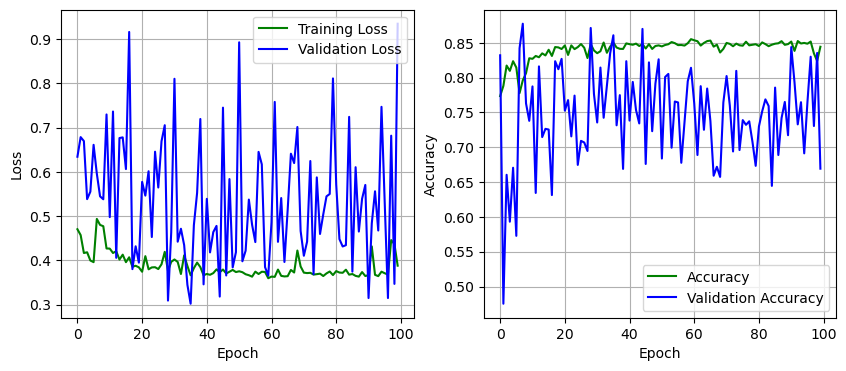

119/119 [==============================] - 0s 1ms/step - loss: 0.4109 - accuracy: 0.8552
64 nodes, dropout 0.2, learning_rate 0.1, batch size 128


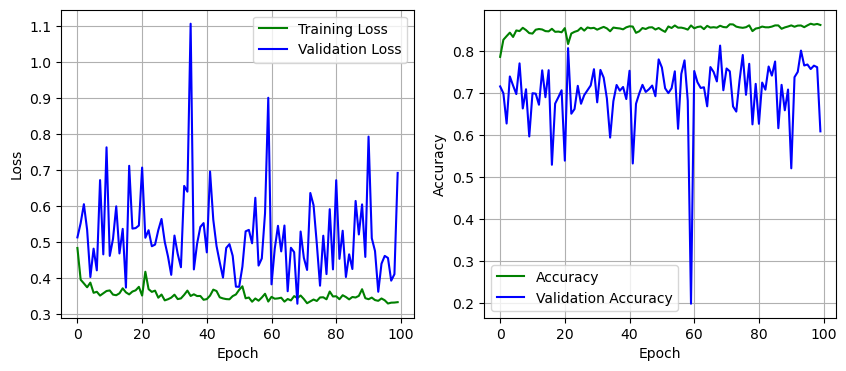

119/119 [==============================] - 0s 1ms/step - loss: 0.3428 - accuracy: 0.8533
64 nodes, dropout 0.2, learning_rate 0.001, batch size 32


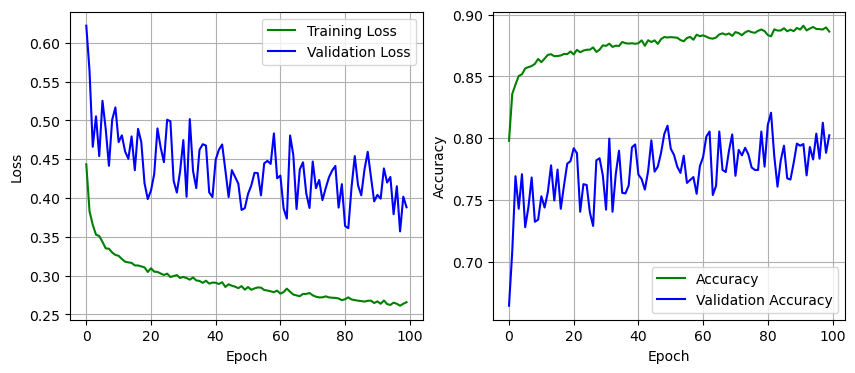

119/119 [==============================] - 0s 1ms/step - loss: 0.2971 - accuracy: 0.8804
64 nodes, dropout 0.2, learning_rate 0.001, batch size 64


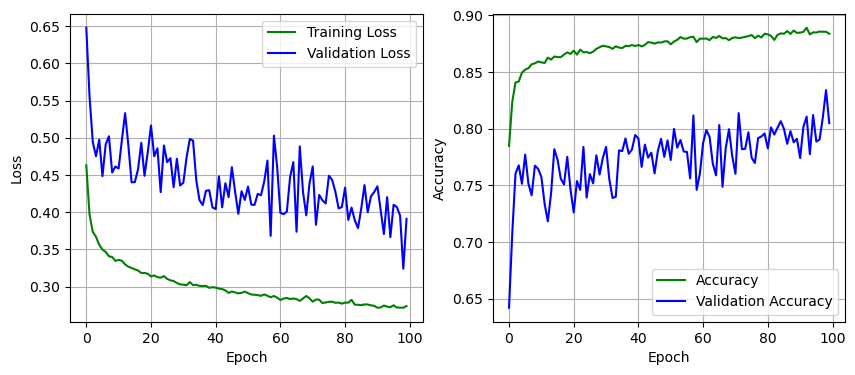

119/119 [==============================] - 0s 1ms/step - loss: 0.2971 - accuracy: 0.8764
64 nodes, dropout 0.2, learning_rate 0.001, batch size 128


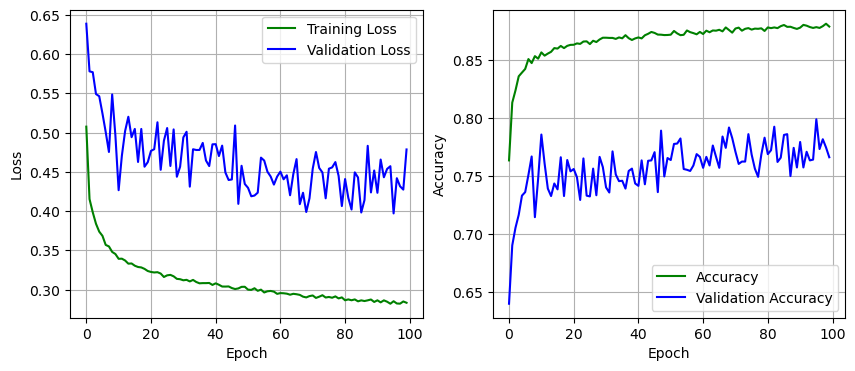

119/119 [==============================] - 0s 1ms/step - loss: 0.2962 - accuracy: 0.8807
64 nodes, dropout 0.2, learning_rate 0.005, batch size 32


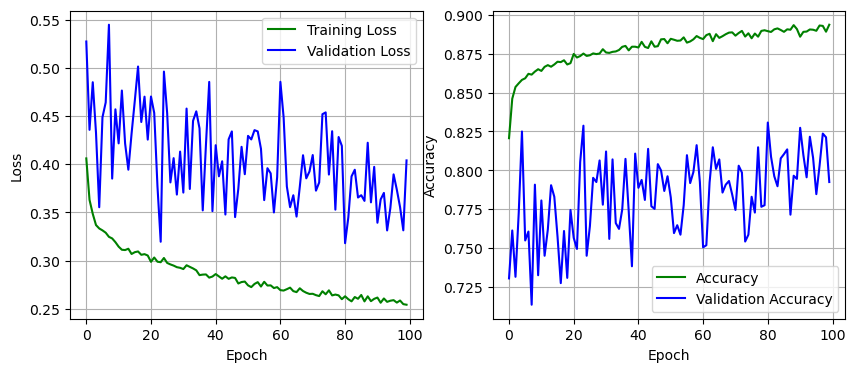

119/119 [==============================] - 0s 1ms/step - loss: 0.3226 - accuracy: 0.8775
64 nodes, dropout 0.2, learning_rate 0.005, batch size 64


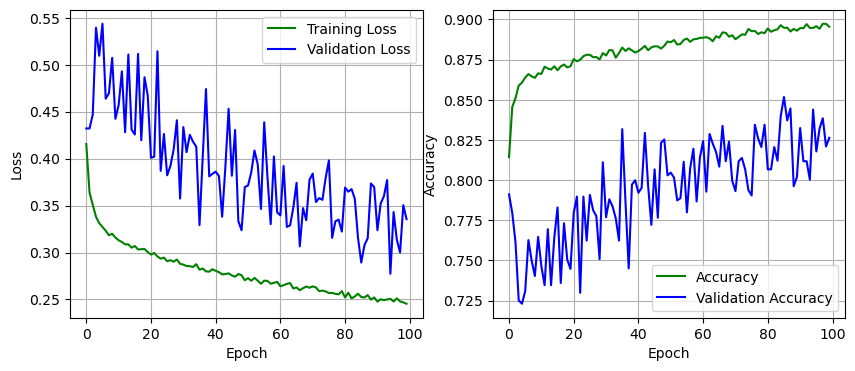

119/119 [==============================] - 0s 1ms/step - loss: 0.3141 - accuracy: 0.8791
64 nodes, dropout 0.2, learning_rate 0.005, batch size 128


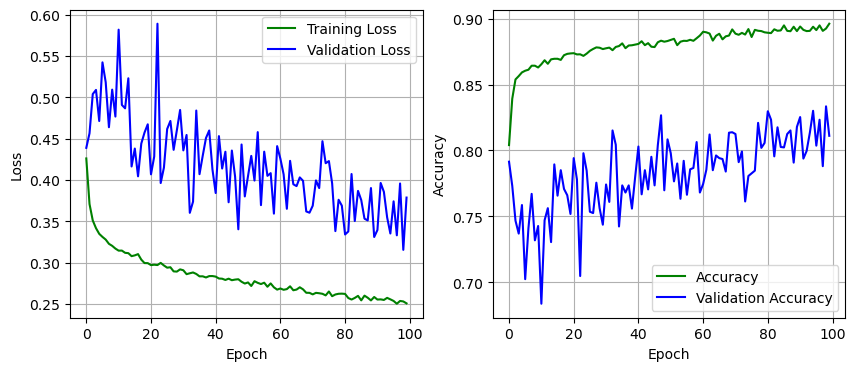

119/119 [==============================] - 0s 1ms/step - loss: 0.3152 - accuracy: 0.8793


In [58]:
# GridSearchCV
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for learning_rate in [0.1, 0.001, 0.005]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, learning_rate {learning_rate}, batch size {batch_size}")
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, learning_rate, 
                                             batch_size, epochs)
                plot_graphs(history)
                
                val_loss = model.evaluate(X_valid, y_valid)
                if val_loss[0] < least_val_loss:
                    least_val_loss = val_loss[0]
                    least_loss_model = model

In [59]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 0s 1ms/step


In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.76      0.81      1362
           1       0.87      0.94      0.91      2442

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.87      3804

